# Using deep learning package of tree point classification model in ArcGIS API for Python

- 🥠 Deep Learning
- ☁️ Point Cloud Classification

## Table of Contents
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Table of Contents</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports-and-Initial-steps" data-toc-modified-id="Imports-and-Initial-steps-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports and Initial steps</a></span></li><li><span><a href="#Downloading-the-deep-learning-package-file" data-toc-modified-id="Downloading-the-deep-learning-package-file-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Downloading the deep learning package file</a></span><ul class="toc-item"><li><span><a href="#Downloading-using-ArcGIS-API-for-Python" data-toc-modified-id="Downloading-using-ArcGIS-API-for-Python-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Downloading using ArcGIS API for Python</a></span></li><li><span><a href="#Download-manually-to-a-local-directory:" data-toc-modified-id="Download-manually-to-a-local-directory:-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Download manually to a local directory:</a></span></li></ul></li><li><span><a href="#Classifcation-using-Trained-Model" data-toc-modified-id="Classifcation-using-Trained-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Classifcation using Trained Model</a></span></li><li><span><a href="#Sample-Results" data-toc-modified-id="Sample-Results-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Sample Results</a></span></li></ul></div>

## Introduction

Classification of point clouds has always been a challenging task due to its naturally unordered data structure. The workflow described in this notebook is about using the tree point classification model, available as a deep learning package on the Living Atlas. In general, it is harder to classify high vegetation/tree points, as compared to other entities of interest, due to the complex nature of tree points. Deep learning can be utilized, in these cases where traditional algorithms have problems to give good results.

**Note:** A conda environment with all the deep learning dependencies for the 'ArcGIS API for Python' is needed to use this model, Kindly use <a href="https://github.com/esri/deep-learning-frameworks"  target="_blank">deep learning installer</a>  to setup your ArcGIS Pro 2.6 environment.
For older ArcGIS Pro version or Anaconda users, kindly use the meta-package `deep-learning-essentials`, as mentioned in the <a href="https://github.com/esri/deep-learning-frameworks"  target="_blank">deep learning installer</a> webpage.

Kindly run the cells below step by step, and proceed further, as per the instructions:

## Imports and Initial steps 

`zipfile`, `os`, `tempfile` & `arcgis` python packages are used, where `arcgis`'s `learn` module dependencies are installed via <a href="https://github.com/esri/deep-learning-frameworks"  target="_blank">deep learning installer</a>. <br>
(Install any missing packages, if required.)

In [ ]:
from zipfile import ZipFile
import os, tempfile
from arcgis.learn import PointCNN
from arcgis.gis import GIS

def dlpk(model_path):
    with ZipFile(model_path, 'r') as zip_obj:
        temp_folder = tempfile.TemporaryDirectory().name
        zip_obj.extractall(temp_folder)
    for file in os.listdir(temp_folder):
        if file.endswith(".emd"):
            model_path=(os.path.join(temp_folder, file))
    return model_path

## Downloading the deep learning package file

Tree points classification model is hosted on Living Atlas, <a href="https://arcg.is/1nyfPz"  target="_blank">here</a>. <br>
Either we can provide the downloaded model's path manually, or we can automatically download it using ArcGIS API for Python.

### Downloading using ArcGIS API for Python

In [2]:
gis = GIS()
tree_point_classification_model = gis.content.get('58d77b24469d4f30b5f68973deb65599')
tree_point_classification_model

<Item title:"Tree Point Classification" type:Deep Learning Package owner:esri_analytics>

In [ ]:
download_path = tree_point_classification_model.download(file_name=tree_point_classification_model.name)

In [ ]:
model_path=dlpk(download_path)

### Download manually to a local directory:

Alternatively, we can provide the path of the locally downloaded deep learning package file. (<a href="https://arcg.is/1nyfPz"  target="_blank">download link</a>) <br>
Like, `download_path`= `r"C:\tree_model\Tree_point_classification.dlpk"`

In [ ]:
download_path=r'Path to the downloaded Tree_point_classification.dlpk file'

In [ ]:
model_path=dlpk(download_path)

## Classifcation using Trained Model

Loading a model for classification of point clouds. `PointCNN.from_model()` is used for this. <br>
Here, model_path is utilized, which is generated in previous cells.

In [ ]:
pc=PointCNN.from_model(model_path)

For classification of point clouds using the trained model, `predict_las()` is used. It only requires two mandatory parameters, 'input path' and 'output path'. There are some additional options for the remapping of class-codes & selective classification.

- `path`: 
   The path to the folder where the `las` files are present.


- `output_path`:
  The path to the folder where to dump the resulting `las` files.


- `remap_classes`:
    This parameter can be used for mapping from class values to user-defined values.


- `selective_classify`: 
   If passed, `predict_las` will selectively classify only those points belonging to the specified class-codes. Other points in the input point clouds will retain their class-codes. 

In [ ]:
pc.predict_las(r'input', r'output_pred')

## Sample Results

Below are some of the sample results:


<p align="center">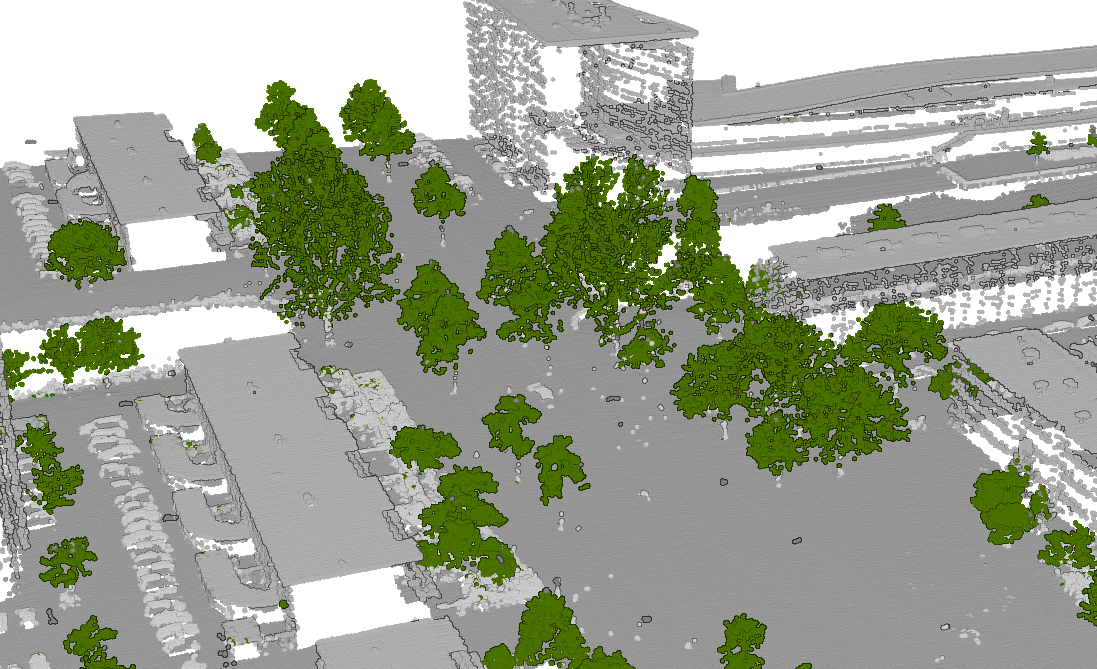</p>


<center><b>Figure 1</b></center>


<p align="center">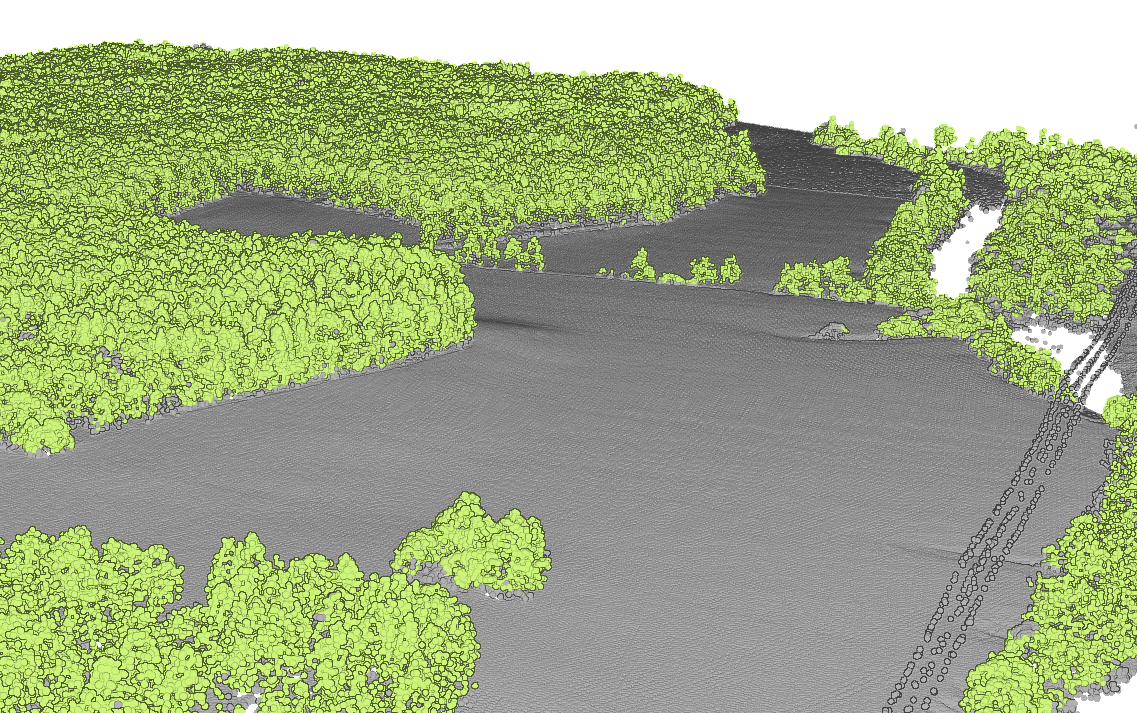</p>

<center><b>Figure 2</b></center>

<p align="center">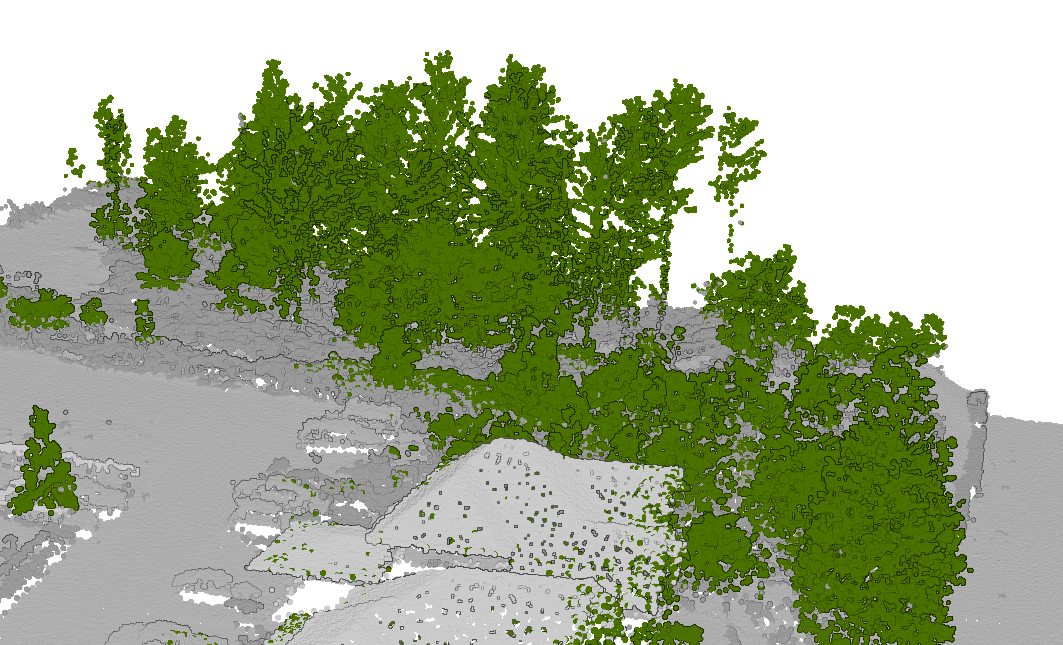</p>

<center><b>Figure 3</b></center>